<a href="https://colab.research.google.com/github/Zeko2005/cap-comp215/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: SIR Epidemiological Model

Name:Ziad Elbadry

Last Updated: 19/2/2024

In [45]:
%matplotlib inline

import math
import random

import matplotlib.pyplot as plt
import networkx as nx
import copy
random.seed(6)

In [46]:
def coin_toss(p):
    """ Simulate flipping a biased "coin", where the probability of 'heads' is p.  Return True iff 'heads', False otherwise """
    return random.random() < p

In [47]:
#This code block creates a new graph object
num_people = 10
average_num_edges = 4
SIRgraph = nx.watts_strogatz_graph(n = num_people, k=average_num_edges, p=0.5, seed=42)

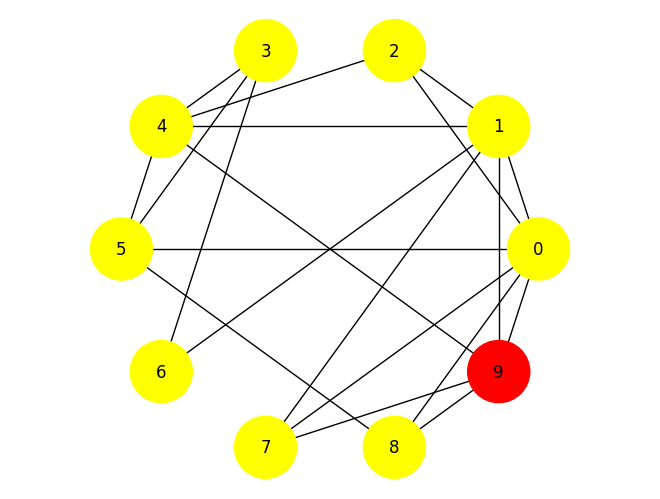

In [48]:
NodeColors = ['yellow' for i in range(num_people)]
case0 = random.randint(0, 9)
NodeColors[case0] = 'red'
nx.draw_circular(SIRgraph,
                 node_color= NodeColors,
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()

In [49]:
#S is yellow
#I is red
#R is blue
#This block of code resets the graph
NodeColors = ['yellow' for i in range(num_people)]
NodeColors[case0] = 'red'
InfectedCases = set()
InfectedCases.add(case0)
RecoveredCases = set()

In [50]:
def find_num_cases(g, sick):
  """ find the number of cases that could be infected """
  possible_cases = set()
  for i in sick:
    for j in list(g.neighbors(i)):
      possible_cases.add(j)
  return possible_cases

def draw(Graph, colors, node_size=2000, with_labels=True):
  nx.draw_circular(Graph,
                 node_color= colors,
                 node_size=2000,
                 with_labels=True)
  plt.axis('equal')
  plt.show()

def step(graph, ncolors, infect, recover):
  for i in infect:
    if coin_toss(0.3):
      recover.add(i)
      ncolors[i] = "blue"
  cases = find_num_cases(graph, infect)
  for i in cases:
    if coin_toss(0.5) and i not in recover:
      infect.add(i)
      ncolors[i] = "red"
  infect = infect - recover
  return ncolors


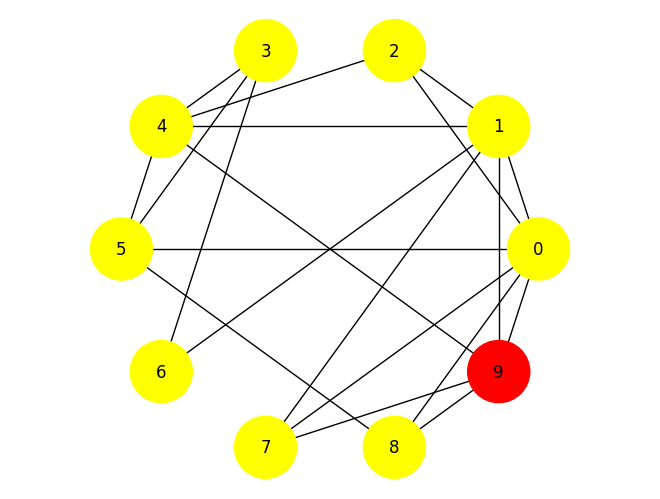

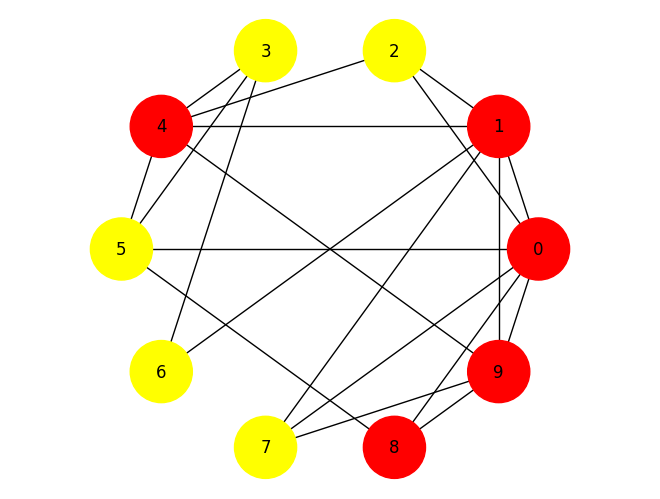

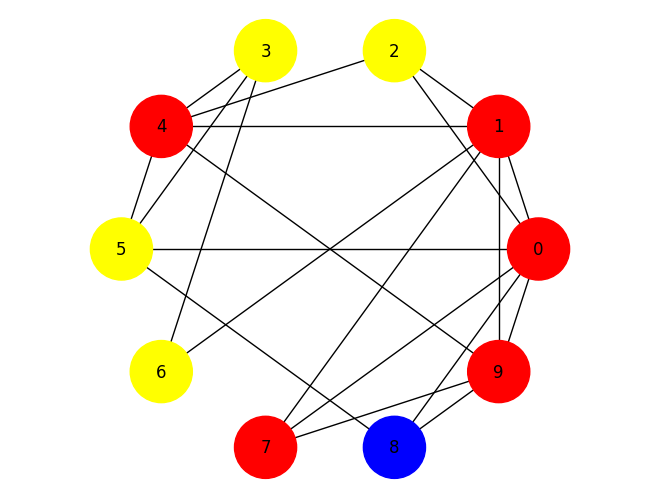

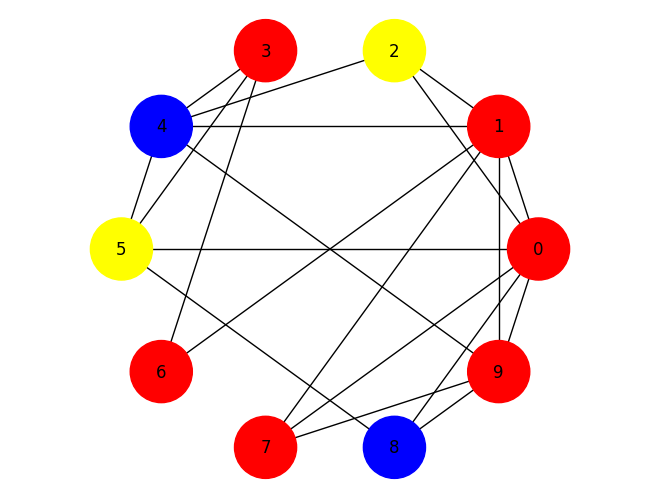

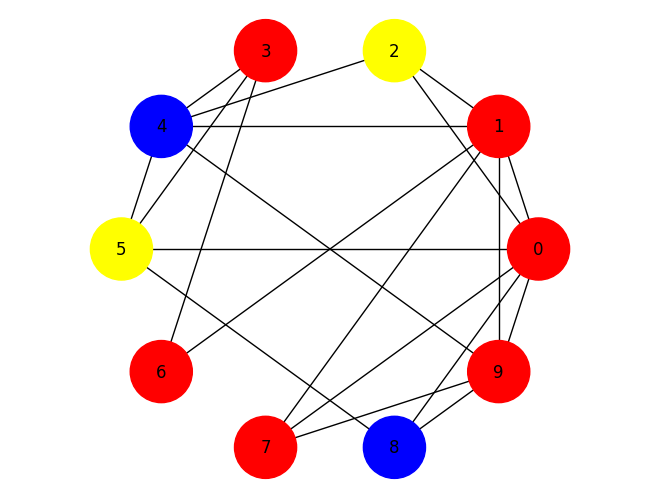

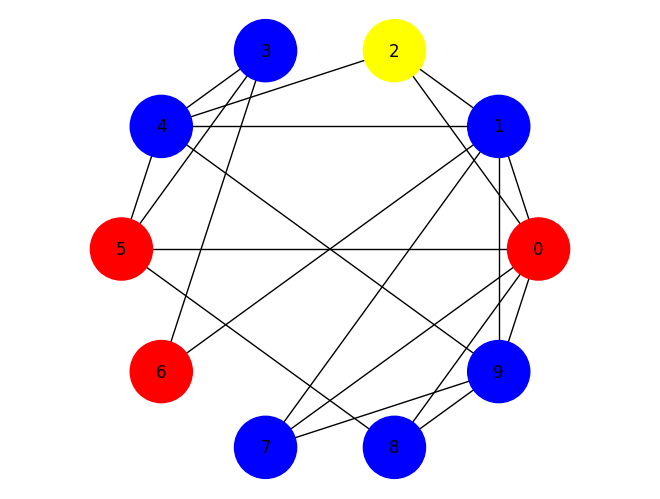

['red', 'blue', 'yellow', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue']

In [51]:
def simulation(n_steps, Graph, node_colors, infected, recovered):
  """ draws the intial graph then does the simulation for n_steps number of times and draws it after each step """
  draw(Graph, node_colors)
  for i in range(n_steps):
    new_colors = step(Graph, node_colors, infected, recovered)
    draw(Graph, new_colors)
  return new_colors

simulation(5, SIRgraph, NodeColors, InfectedCases, RecoveredCases)